# Generating Synthetic data with CTGAN

This time, we are generationg 200 entries, using sample california_housing_train.csv data

# 1. Install Dependencies

We will install 'ctgan' and 'table_evaluator' packages

In [1]:
!pip install ctgan

In [2]:
pip install table_evaluator

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install ipython

In [3]:
import pandas as pd
from ctgan import CTGAN
from table_evaluator import TableEvaluator

# 2. Load Data

Load the California Housing Training dataset, and display the first few
rows to understand its structure

In [4]:
data = pd.read_csv("content/sample_data/california_housing_train.csv")

In [5]:
# Display First few rows of the dataset
print("Original Data:")
print(data.head())

Original Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


# 3. Train CTGAN
Initialize and train CTGAN model on the dataset

Now that the data is loaded, let's use ctgan to generate the data with 200 observations

CTGAN takes some time, depending on system may be up to 5 minutes

In [7]:
ctgan = CTGAN(epochs=200, verbose=True)
ctgan.fit(data)

Gen. (-0.98) | Discrim. (-0.00): 100%|██████████| 200/200 [03:18<00:00,  1.01it/s]


# 4. Generate Synthetic Samples

Generated synthetic data samples and display them to verify

In [8]:
samples = ctgan.sample(200)

In [9]:
# Display first few rows of synthetic samples
print("Synthetic Data:")
print(samples.head())

Synthetic Data:
    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -122.248913  37.726153           31.180793  2131.054864      606.615328   
1 -117.289795  32.910944           26.047494  2118.106780      368.705418   
2 -118.200567  33.942696           41.151826  1722.003879      261.242999   
3 -118.111945  34.041978           15.050433  2934.859413      606.485305   
4 -117.278464  36.924512           44.023402  2772.436056      385.068193   

    population   households  median_income  median_house_value  
0  1705.768032   397.663268       2.608415       205002.017548  
1  1281.431781   216.645889       1.655039       162162.880794  
2   640.987016  1231.856765       4.504666       239756.861888  
3  4210.296711  1169.659270       2.649767       193669.641676  
4   965.644116   219.825833       3.523600       179475.381784  


# 5. Evaluate Synthetic Data

Using "table_evaluator" to compare synthetic data with the original data

Now, let's compare how the data matches with the original data.

We will use Table_evaluator to test this

In [10]:
# Evaluate the synthetic data against original data
print("Shape of original data:", data.shape)
print("Shape of synthetic data:", samples.shape)

Shape of original data: (17000, 9)
Shape of synthetic data: (200, 9)


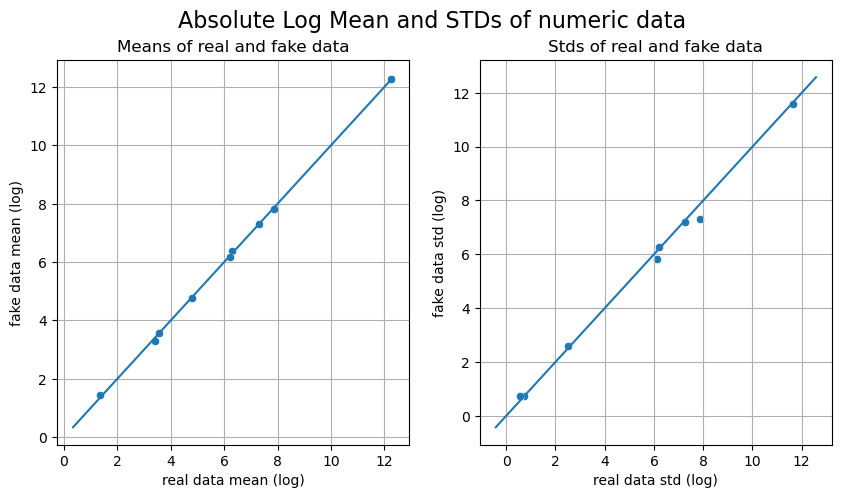

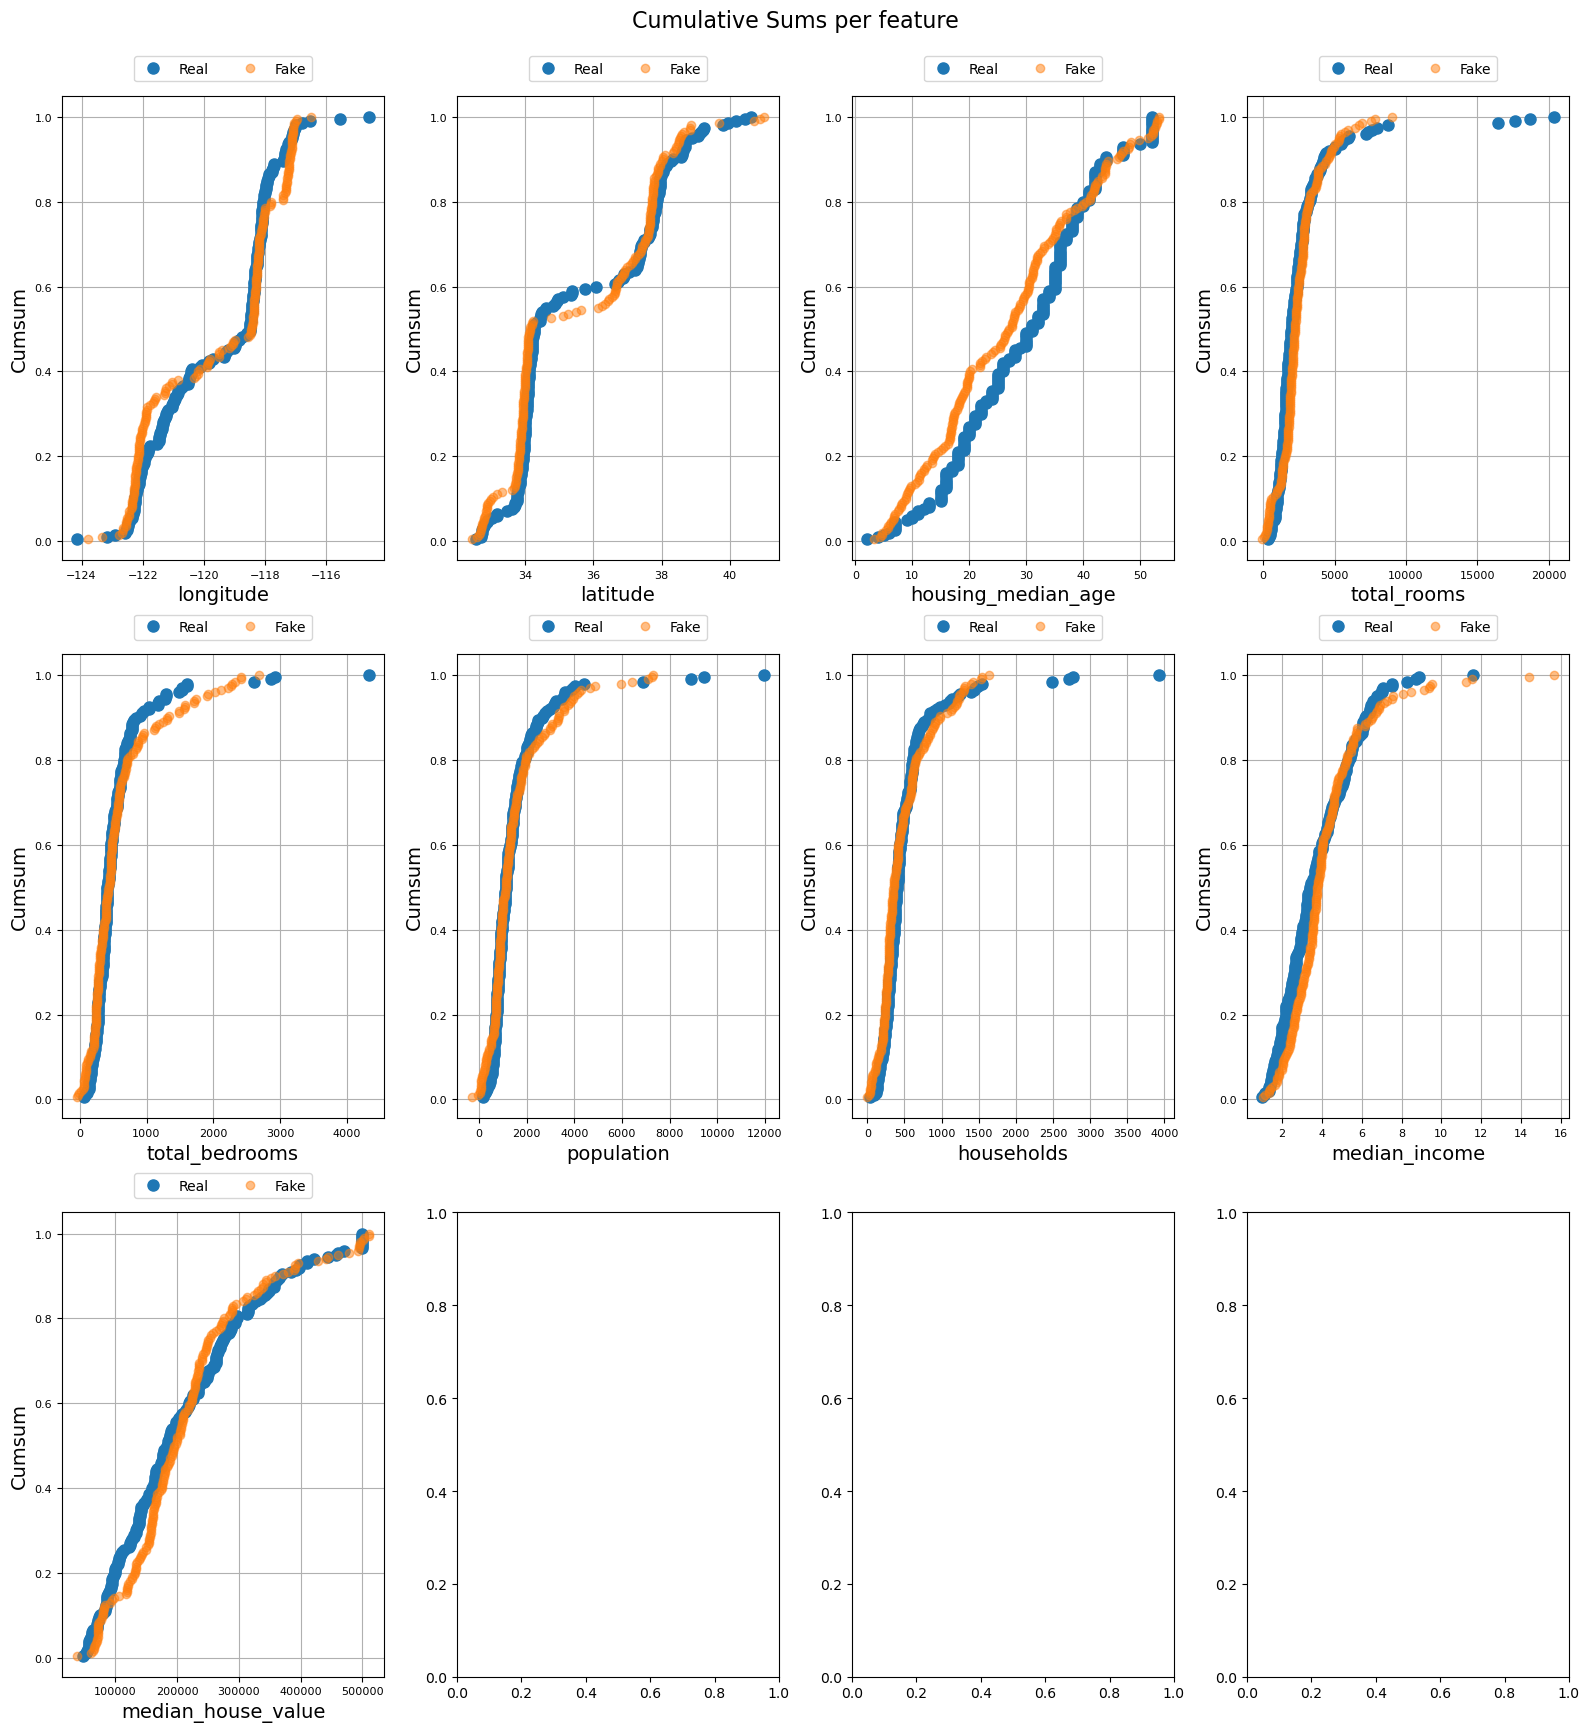

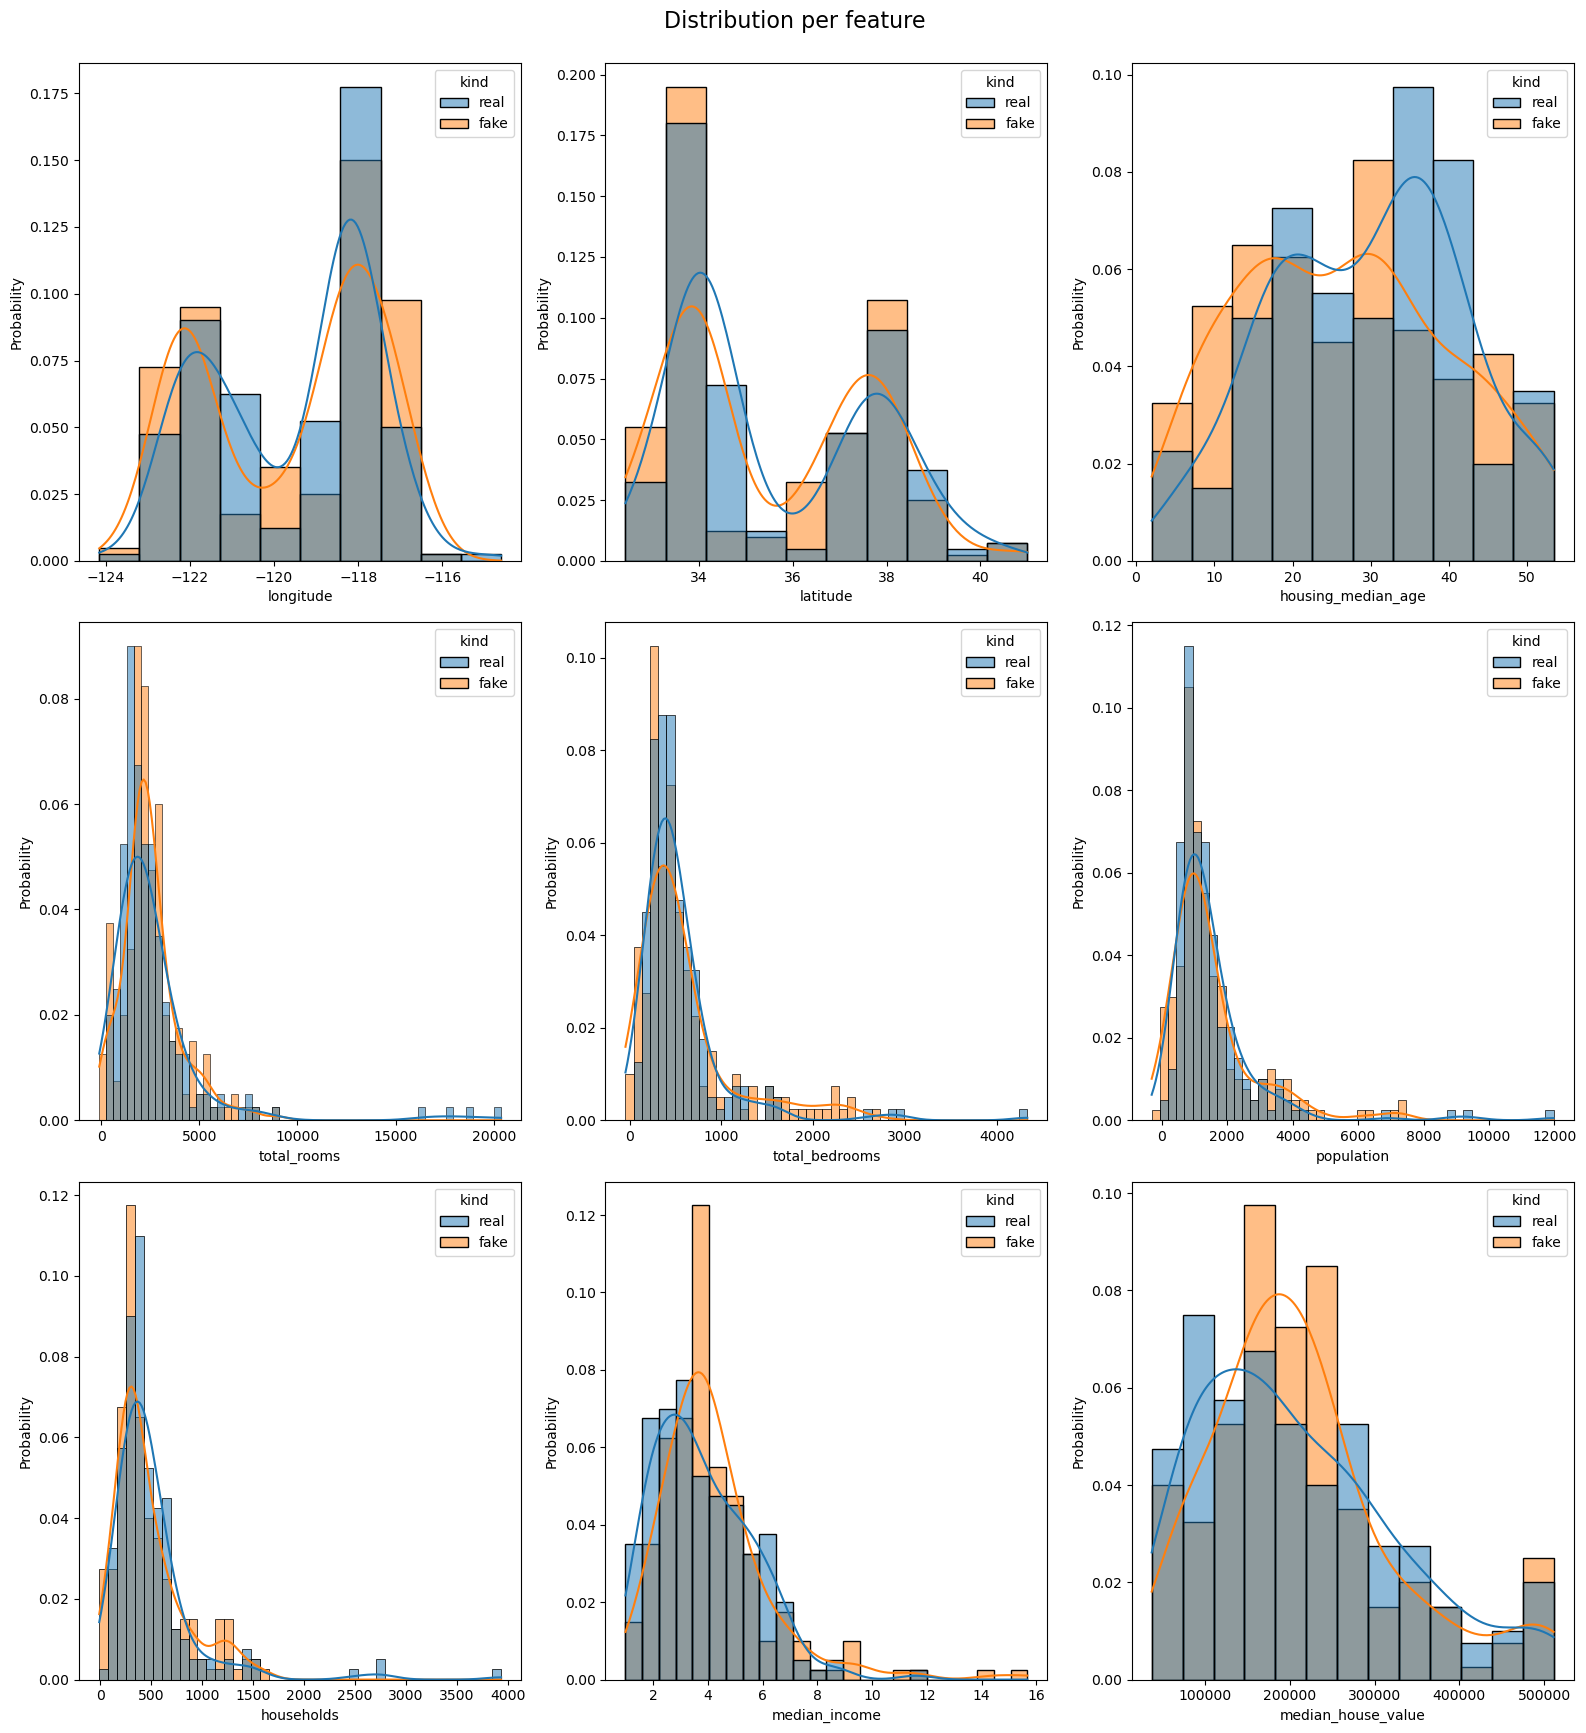

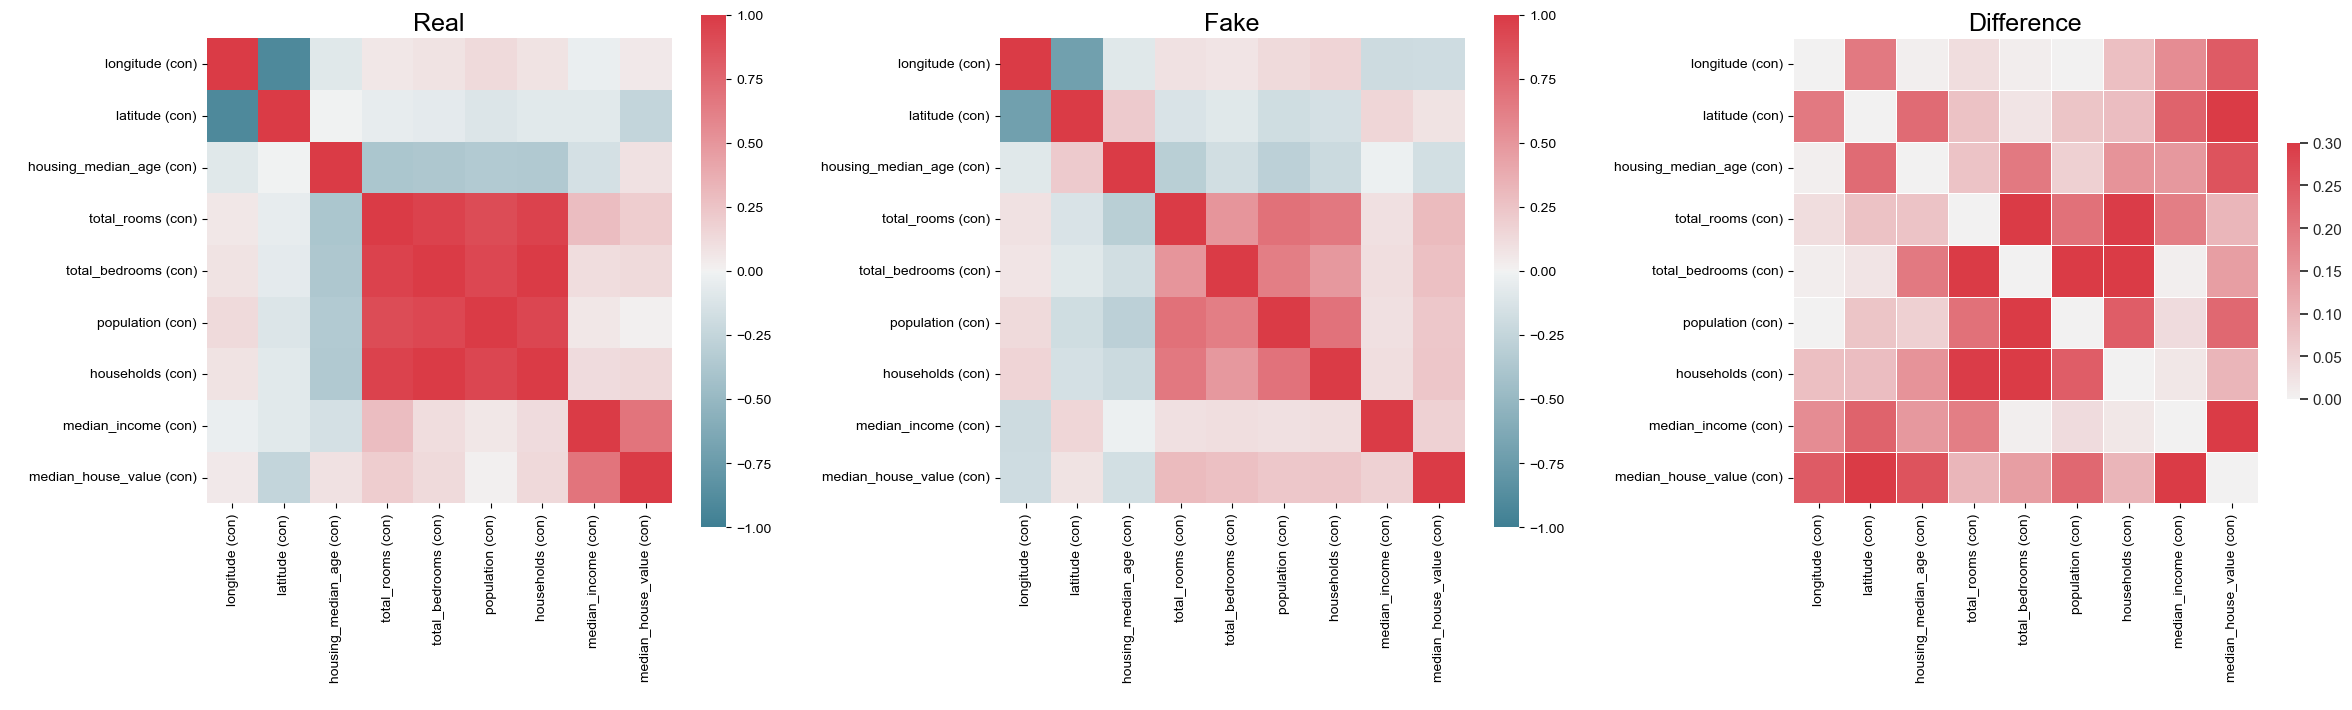

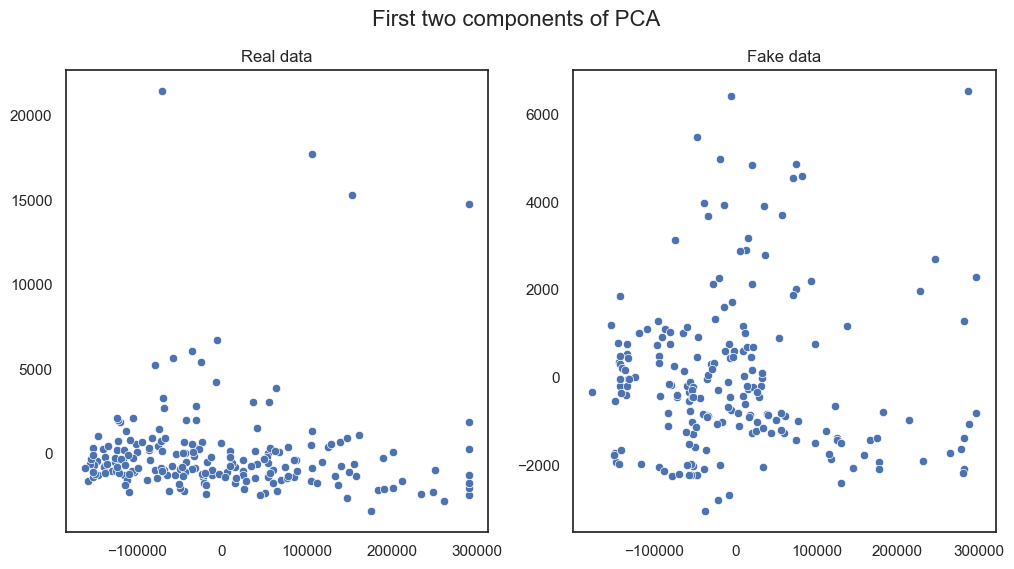

In [11]:
table_evaluator = TableEvaluator(data, samples)
table_evaluator.visual_evaluation()

# 6. Export Augmented Data to CSV

Great! Our new data matches very closely with the statistical distributions of our original data.

Here is our new augmented data set!

Now, let's just export to csv

In [12]:
# Save synthetic samples to CSV
samples.to_csv('samples.csv')

## Additional Tips:

1. __Hyperparameter Tuning:__ Experiment with different hyperparameters (e.g., batch size, learning rate, epochs) to improve the quality of the synthetic data.
2. __Feature Engineering__: Ensure that any necessary feature engineering steps are applied to both the original and synthetic data for a fair comparison.
3. __Evaluation Metrics__: Use additional evaluation metrics provided by TableEvaluator to assess the quality of the synthetic data comprehensively.

## Visual Evaluation

The __TableEvaluator__ provides visualizations to help you understand the similarities and differences between the original and synthetic datasets. This includes comparisons of distributions, correlations, and other statistical properties.